In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.model_selection import train_test_split

from sklearn.ensemble import IsolationForest

# training data
pp = np.load('./perfect_patches.npy')
dp = np.load('./defect_patches.npy')

# test data
graphene = np.load('./full-stack.npy')

# data set of 50/50 perfect to imperfect images
patches = np.concatenate([pp, dp])  # matrices
gt = np.concatenate([np.zeros(len(pp)), np.ones(len(dp))])  # labels

xy = list(zip(patches, gt))
random.shuffle(xy)  # shuffle the tuples

X_train, X_test, y_train, y_test = train_test_split(
    patches,
    gt,
    test_size=0.2,
    shuffle=True,
    random_state=42,
)               # split the dataset

nsamples, nx, ny = X_train.shape
X_train_transformed = X_train.reshape((nsamples, nx * ny))

nsamples, nx, ny = X_test.shape
X_test_transformed = X_test.reshape((nsamples, nx * ny))          #reshape



In [2]:
if_clf = IsolationForest(random_state=42, n_estimators=100, contamination=0.014)
if_clf.fit(X_train_transformed, y_train)

y_pred = if_clf.predict(X_test_transformed)
print(y_pred)
print(y_test)
y_test_translated=np.copy(y_test)
y_test_translated[y_test_translated==1]=-1
y_test_translated[y_test_translated==0]=1
print(y_test_translated)

[ 1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1

In [3]:
print(np.array(y_pred == y_test_translated))
print('')
print('Percentage correct: ', 100 * np.sum(y_pred == y_test_translated) / len(y_test_translated))

labels = y_test_translated
predictions = y_pred

df = pd.DataFrame(
    np.c_[labels, predictions],
    columns=['true_label', 'prediction']
)
print(df)

[ True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

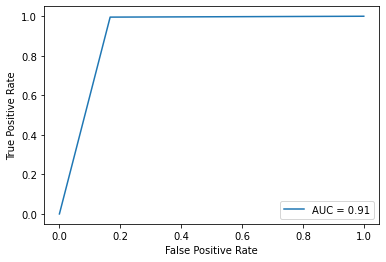

In [4]:
from sklearn.metrics import roc_curve, RocCurveDisplay, auc
fpr, tpr, thresholds = roc_curve(y_test_translated, y_pred)
roc_auc = auc(fpr, tpr)
roc = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc.plot()

In [5]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=3)
results =cross_val_score(if_clf ,X_test_transformed,y_test_translated, scoring="roc_auc")
print(results) 

[0.91481481 0.96703297 0.9747191  0.82777778 0.97802198]


In [61]:
# bad defects - 3, good example - 5

cols1 = np.delete(graphene[5], np.s_[0:32], axis=1)
cols2 = np.delete(cols1, np.s_[192:], axis=1)
rows1 = np.delete(cols2, np.s_[0:32], axis=0)
rows2 = np.delete(rows1, np.s_[192:], axis=0)

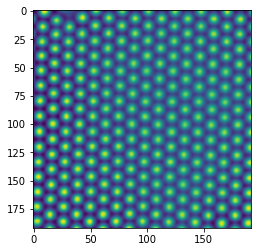

In [62]:
plt.imshow(rows2)

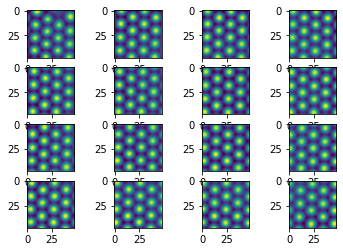

In [63]:
def split_to_patches(array, split_h, split_v):
    v_split = np.vsplit(array, split_v)
    values = []
    for x in v_split:
        for y in np.hsplit(x, split_h):
            values.append(y)

    return values

a = split_to_patches(rows2, 4, 4)
fig, ax = plt.subplots(4, 4)
pred = []
for i, x in enumerate(ax.ravel()):
    x.imshow(a[i])

In [22]:
print(a)

[array([[[0.4256035 ],
        [0.39521384],
        [0.35193333],
        ...,
        [0.36787093],
        [0.36470145],
        [0.3468795 ]],

       [[0.34708512],
        [0.3240701 ],
        [0.29321057],
        ...,
        [0.4373414 ],
        [0.4349823 ],
        [0.4132167 ]],

       [[0.32501096],
        [0.3031028 ],
        [0.27664584],
        ...,
        [0.5367955 ],
        [0.53283775],
        [0.50421864]],

       ...,

       [[0.67024964],
        [0.64359415],
        [0.58145523],
        ...,
        [0.75815266],
        [0.8262119 ],
        [0.8455146 ]],

       [[0.7907096 ],
        [0.7528846 ],
        [0.6719597 ],
        ...,
        [0.7688037 ],
        [0.83510494],
        [0.8509713 ]],

       [[0.8745928 ],
        [0.82984865],
        [0.73724806],
        ...,
        [0.73073334],
        [0.7914468 ],
        [0.8061769 ]]], dtype=float32), array([[[0.3222396 ],
        [0.30154312],
        [0.30961964],
        ...,
        [

In [30]:
print(a.shape)

(16, 48, 48, 1)


In [65]:
#nsamples, nx, ny = a.shape
a = np.array(a)
a_transformed = a.reshape((16, 48 * 48))

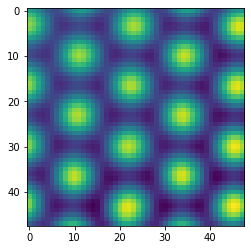

In [66]:
plt.imshow(a[15])

In [ ]:
[1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]

In [67]:
y_pred = if_clf.predict(a_transformed)
print(y_pred)

[-1  1  1  1 -1  1  1  1 -1 -1  1  1 -1 -1  1 -1]


In [35]:
y_pred = np.array(y_pred).reshape((4, 4))

In [36]:
print(y_pred)

[[-1 -1 -1 -1]
 [-1 -1 -1 -1]
 [ 1  1  1  1]
 [ 1  1  1  1]]
